<a href="https://www.kaggle.com/code/peacehegemony/british-national-bibliography?scriptVersionId=118519752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

To exploit a dataset serialized as RDF/XML in Kaggle, we will first need to install the necessary libraries. In this case, we will need the rdflib library to parse the RDF/XML data. We can install this library using !pip install rdflib.

Next, we will need to import the necessary libraries and load the dataset. We can use the rdflib library to parse the RDF/XML data and store it in a graph object.

In [1]:
%%capture
!pip install rdflib

In [2]:
import rdflib



# Load the dataset into a graph object
g = rdflib.Graph()
result = g.parse("/kaggle/input/british-national-bibliography-bnb-books-lod/BNBLODB_202211_f01.rdf")


print(f'Loaded {len(g)} triples')

Loaded 2287559 triples


Once the data is loaded, we can begin exploring it. One way to do this is to find the predicates (properties) and objects in the dataset. We can do this using the predicates() and objects() methods of the graph object.

In [3]:
%%capture predi
# Find the predicates (properties) in the dataset
predicates = set([str(p) for p in g.predicates()])


print(predicates)

In [4]:
%%capture obj
# Find the objects in the dataset
objects = set([str(o) for o in g.objects()])
print(objects)

We can also use SPARQL queries to retrieve specific information from the dataset. For example, we can use the following query to find the titles and authors of all books in the dataset:

In [5]:
%%capture result
# Find the titles and authors of all books in the dataset
query = """
    PREFIX dct: <http://purl.org/dc/terms/>
    PREFIX bibo: <http://purl.org/ontology/bibo/>
    SELECT ?title ?author
    WHERE {
        ?book a bibo:Book .
        ?book dct:title ?title .
        ?book dct:creator ?author .
    }
"""


results = g.query(query)


for result in results:
    print(f'Title: {result["title"]}')
    print(f'Author: {result["author"]}')

Alternatively, we can also store the results in a Pandas dataframe for further analysis and manipulation. To do this, we will need to install the pandas library using !pip install pandas.

Once the pandas library is installed, we can use the following code to store the results in a dataframe:

In [6]:
import pandas as pd



df = pd.DataFrame(columns=['Title', 'Author'])


for result in results:
    df = df.append({'Title': result['title'], 'Author': result['author']}, ignore_index=True)


df.head()

,Title,Author
0,A history of the Maghrib,http://bnb.data.bl.uk/id/person/Abun-NasrJamil...
1,The revolt of the mind : a case history of int...,http://bnb.data.bl.uk/id/person/Acz%C3%A9lTam%...
2,"Space flight : satellites, spaceships, space s...",http://bnb.data.bl.uk/id/person/AdamsCarsbieC%...
3,Strains of discord : studies in literary openness,http://bnb.data.bl.uk/id/person/AdamsRobertM%2...
4,Sun and shadow at Aswan : a commentary on dams...,http://bnb.data.bl.uk/id/person/AddisonHerbert


From here, we can use the various methods and functions provided by the pandas library to manipulate and analyze the data. For example, we can use the groupby() and count() methods to find the most common authors in the dataset.

In [7]:
%%capture auth
author_counts = df.groupby('Author').count()


most_common_authors = author_counts.sort_values(by='Title', ascending=False).head(10)
print(most_common_authors)

To visualize the results of our analysis using matplotlib or seaborn, we will first need to install these libraries. We can install matplotlib and seaborn using !pip install matplotlib seaborn.

Once these libraries are installed, we can use them to create various types of plots and visualizations. For example, let's say we want to visualize the most common authors in the dataset using a bar plot. We can do this using the following code:

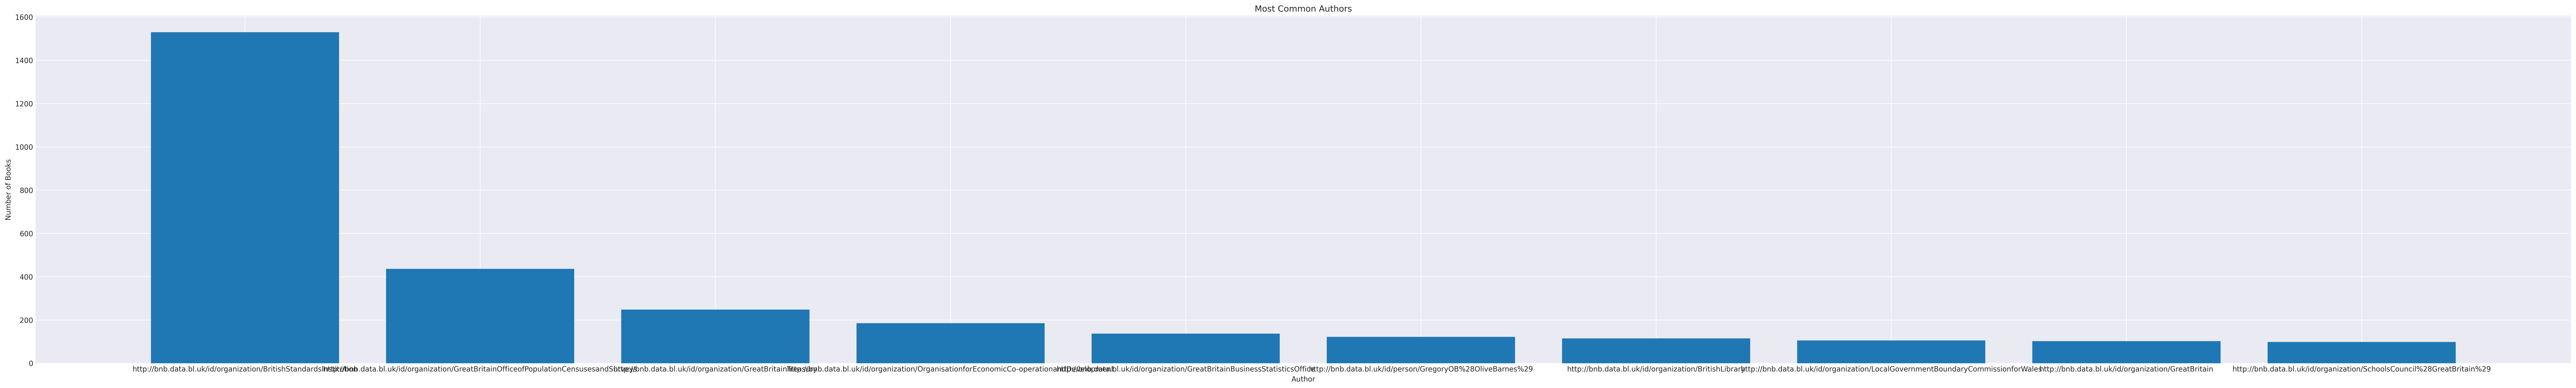

In [8]:
import matplotlib.pyplot as plt



plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300



# Set the style and size of the plot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (64, 9), dpi = 300)


# Plot the data
plt.bar(most_common_authors.index, most_common_authors['Title'])


# Add labels and title
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Most Common Authors')

plt.show()

This will create a bar plot showing the number of books written by the most common authors in the dataset.

Alternatively, we can also use seaborn to create this plot. seaborn is a higher-level library built on top of matplotlib that provides many convenient functions for creating various types of plots.

To create a bar plot using seaborn, we can use the following code:

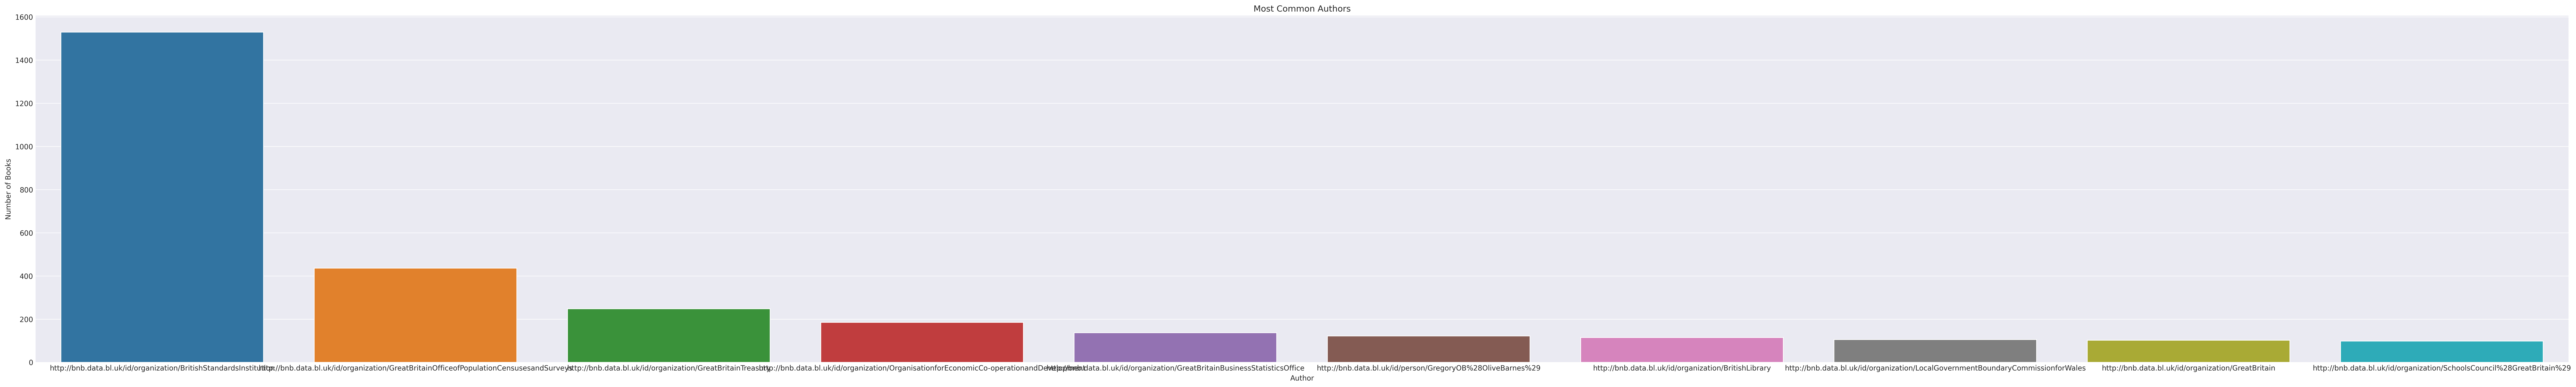

In [9]:
import seaborn as sns



# Set the style and size of the plot
sns.set_style('darkgrid')
plt.figure(figsize = (64, 9), dpi = 300)


# Plot the data
sns.barplot(x = most_common_authors.index, y = most_common_authors['Title'])


# Add labels and title
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Most Common Authors')

plt.show()

This will create the same bar plot as before, but using seaborn instead of matplotlib.

We can also use these libraries to create other types of plots, such as line plots, scatter plots, and histograms, to visualize the data in different ways.